In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt
import json
import os

We are going to read the energy eigenvalues and dipole matrix elements from .npy files.  We will also still create an instance of the PFHamiltonianGenerator class so we can use its build_pcqed_pf_hamiltonian() method, but it is not really important what details we use to instantiate this class... so we will use LiH in a minimal basis since this is a fast way to instantiate the class!

In [2]:
# # Set the molecule and bond length
# mol = psi4.geometry("""
# 0 1
# O
# H 1 1.0
# """)

# # Optimize the geometry to obtain the new coordinates
# psi4.optimize('scf/cc-pvdz')

# # Get the new optimized coordinates
# new_coordinates = mol.geometry()

# # Print the new coordinates
# print(new_coordinates)

In [3]:
# read data from .npy files for formaldehyde casci(8,8) calculations

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/rmandern/code/SCQED-PCQED/LiH_data/"

# these file names should still be good
E_npy_file = npy_folder + "LiH_r_scan_6311g_fci_Energies.npy"
Mu_npy_file = npy_folder + "LiH_r_scan_6311g_fci_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)

# print their shape so we know how many elements we have
print(np.shape(E_array))
print(np.shape(Mu_array))
# print(E_array)

(500, 25)
(500, 500, 3, 25)


In [4]:
# setup basic arguments to create an instance of the PFHamiltonianGenerator class
mol_str = """
    Li
    H 1 1.4
    symmetry c1
"""


options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}


cavity_free_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 10, 
}

# create the instance of our PFHamiltonianGenerator class
instance = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236296037
CQED-RHF One-electron energy      = -12.6946346236296037
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570473   dE = -7.86054E+00   dRMS = 1.78805E-13
SCF Iteration   2: Energy = -7.8605386610570385   dE =  8.88178E-15   dRMS = 3.97663E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.23531103134155273 seconds
 Completed 1HSO Build in 5.507469177246094e-05 seconds
 Completed ERI Build in 0.0011620521545410156 seconds 
 Completed 2D build in 7.295608520507812e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.291534423828125e-05 seconds
 Completed determinant list in 0.00044798851013183594 seconds 
 Completed constant offset matrix in 8.0108642578125e

In [12]:
N_R = 21
d_array = np.linspace(0, 20, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_40010_dse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_40010_dse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [10]:
N_R = 21
d_array = np.linspace(0, 20, N_R)
N_l = len(d_array)
N_el = 300
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_30010_dse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_30010_dse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

[-8.71173356e-10 -8.91034801e-10 -9.11908771e-10 -9.33821909e-10
 -9.56802637e-10 -9.80852732e-10 -1.00603437e-09 -1.03268505e-09
 -1.06042286e-09 -1.08897247e-09 -1.11884191e-09 -1.14958354e-09
 -1.18073906e-09 -1.21013599e-09 -1.23949739e-09 -1.26579813e-09
 -1.28768818e-09 -1.30433975e-09 -1.31551126e-09 -1.32214417e-09
 -1.32532563e-09]
[-8.01219489 -8.01443775 -8.01621169 -8.01756729 -8.01854998 -8.01920058
 -8.01955584 -8.01964882 -8.0195093  -8.01916409 -8.01863737 -8.01795094
 -8.01712442 -8.01617551 -8.01512015 -8.0139727  -8.01274607 -8.01145188
 -8.01010057 -8.00870151 -8.00726313]


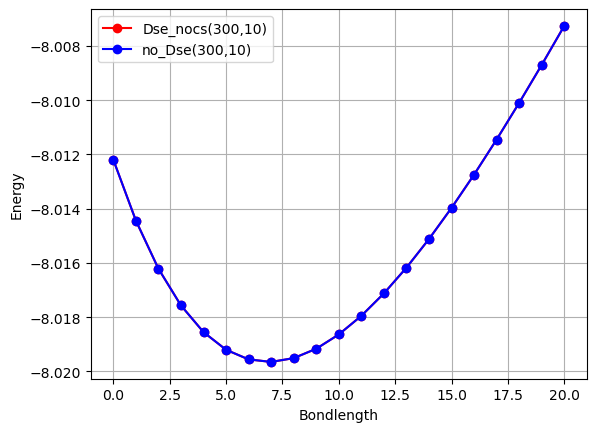

In [17]:
difference =_pcqed_40010_dse[:,0] - _pcqed_30010_dse[:,0]
print(difference)
plt.plot(d_array, _pcqed_40010_dse[:,0],'ro-', label="Dse_nocs(300,10)")
# plt.plot(d_array,_pcqed_22_cs[:,0], label='Dse_cs')
plt.plot(d_array,_pcqed_30010_dse[:,0], 'bo-', label='no_Dse(300,10)')
# plt.plot(d_array,_pcqed_22_withoutdse_cs[:,0], label='noDse_cs')

# plt.plot(lambda_val[:,2],_pcqed_502[:,2],'ro-', label='2nd')

plt.xlabel('Bondlength')
plt.ylabel('Energy')
plt.grid()
plt.legend()

In [ ]:
N_R = 21
d_array = np.linspace(0, 20, N_R)
N_l = len(d_array)
N_el = 400
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_22_withoutdse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector ,E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=True)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_22_withoutdse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [ ]:
# print(_pcqed_22_dse)
# print(_pcqed_22_dse[:,0])
print(np.shape(_pcqed_22_dse[:,0]))
print(np.shape(d_array))

In [ ]:
plt.plot(d_array, _pcqed_22_dse[:,0],'ro-', label="Dse_nocs(300,10)")
# plt.plot(d_array,_pcqed_22_cs[:,0], label='Dse_cs')
plt.plot(d_array,_pcqed_22_withoutdse[:,0], 'bo-', label='no_Dse(300,10)')
# plt.plot(d_array,_pcqed_22_withoutdse_cs[:,0], label='noDse_cs')

# plt.plot(lambda_val[:,2],_pcqed_502[:,2],'ro-', label='2nd')
# plt.plot(lambda_val[:,2],_pcqed_502[:,3],'b', label='3rd')
# plt.plot(lambda_val[:,2],_pcqed_502[:,4],'y', label='4th')

plt.xlabel('Bondlength')
plt.ylabel('Energy')
# plt.ylim(-0.0003, -0.0001)
plt.grid()
plt.legend()
plt.savefig('LiH_0.03.png')